<a href="https://colab.research.google.com/github/alangaurav/DAV15714/blob/master/Week_One_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week One: Descriptive Statistics

## Standard Imports

In [1]:
## Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Basic Stats using Pandas

In [3]:
marks = pd.read_excel('/content/drive/MyDrive/DAV Lab/Week One/Datasets/student_marks.xlsx')
print("Data types in the file:\n")
print(marks.dtypes)
print("Summary of the input file:")
print(marks.describe())
print("student marks stats:")
print(marks['Subject1'].describe())

Data types in the file:

Student_ID    object
Group         object
Subject1       int64
Subject2       int64
Subject3       int64
Subject4       int64
Subject5       int64
dtype: object
Summary of the input file:
         Subject1    Subject2   Subject3   Subject4   Subject5
count   30.000000   30.000000  30.000000  30.000000  30.000000
mean    57.600000   55.166667  58.500000  53.900000  55.833333
std     27.001405   25.042148  23.957937  25.540164  25.288792
min     10.000000   12.000000  20.000000  12.000000  11.000000
25%     35.500000   36.500000  39.000000  35.250000  35.500000
50%     56.000000   57.000000  64.500000  54.500000  64.500000
75%     78.000000   74.500000  78.500000  75.750000  76.750000
max    100.000000  100.000000  99.000000  98.000000  93.000000
student marks stats:
count     30.000000
mean      57.600000
std       27.001405
min       10.000000
25%       35.500000
50%       56.000000
75%       78.000000
max      100.000000
Name: Subject1, dtype: float64


In [6]:
titanic = pd.read_csv("/content/drive/MyDrive/DAV Lab/Week One/Datasets/titanic.txt")
titanic.head()
# Descriptive Statistics of  titanic dataset
titanic.describe()
titanic[["Age", "Fare"]].describe()
print("Median for Age and Fare")
print(titanic[["Age", "Fare"]].median())
print("Mean for Age and Fare")
print(titanic[["Age", "Fare"]].mean())
print("Aggregated descriptive functions")
print(titanic.agg({'Age': ['min', 'mean', 'max', 'median', 'skew'],
             'Fare': ['min', 'max', 'median', 'mean', 'skew']}))

Median for Age and Fare
Age     28.0000
Fare    14.4542
dtype: float64
Mean for Age and Fare
Age     29.699118
Fare    32.204208
dtype: float64
Aggregated descriptive functions
              Age        Fare
min      0.420000    0.000000
mean    29.699118   32.204208
max     80.000000  512.329200
median  28.000000   14.454200
skew     0.389108    4.787317


In [7]:
print("Means for the Age column grouped by sex (female and male)")
print(titanic.groupby("Sex")["Age"].mean())

print("Means for the Age column for grouped by sex (female and male) and cabin class (Class 1, 2, 3)")
titanic.groupby(["Sex", "Pclass"])["Age"].mean()

Means for the Age column grouped by sex (female and male)
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Means for the Age column for grouped by sex (female and male) and cabin class (Class 1, 2, 3)


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [8]:
print("How many passengers are there for each cabin class?")
print(titanic["Pclass"].value_counts())

print("How many males and females are there for each cabin class?")
print(titanic.groupby("Sex")["Pclass"].count())

How many passengers are there for each cabin class?
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
How many males and females are there for each cabin class?
Sex
female    314
male      577
Name: Pclass, dtype: int64


## Cumulative plots using PLT

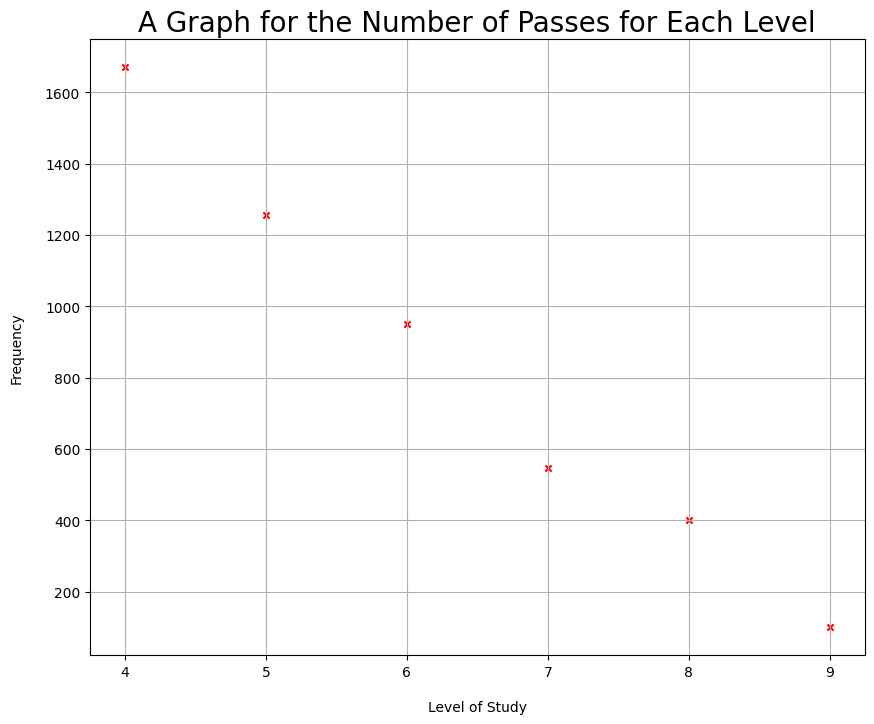

In [9]:
%matplotlib inline

dataset = {'Level': [4, 5, 6, 7, 8, 9],
                   'Pass_Frequency': [1670, 1255, 950, 546, 400, 100]}
df = pd.DataFrame(data=dataset)

df.plot(kind='scatter', x='Level', y='Pass_Frequency',
        figsize=(10, 8), legend=True, marker= "x", color='red', rot=0);
plt.title("A Graph for the Number of Passes for Each Level", fontsize=20)
plt.xlabel("Level of Study", labelpad=15)
plt.ylabel("Frequency", labelpad=15)
plt.grid()
plt.show()

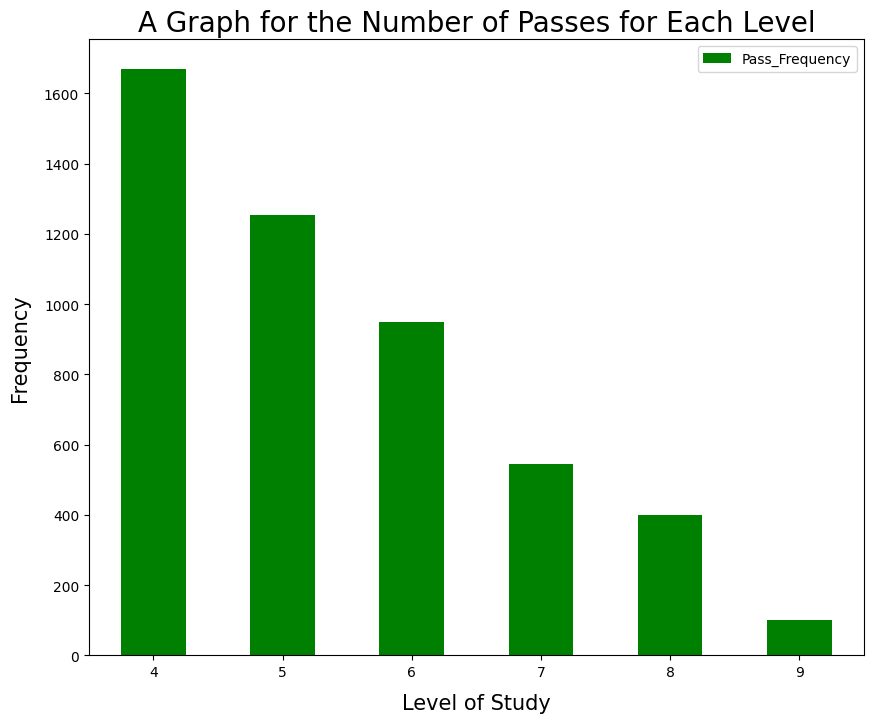

In [10]:
df.plot(kind='bar', x='Level', y='Pass_Frequency',
        figsize=(10, 8), legend=True, color='green', rot=0);
plt.title("A Graph for the Number of Passes for Each Level", fontsize=20)
plt.xlabel("Level of Study", labelpad=10, fontsize=15)
plt.ylabel("Frequency", labelpad=10, fontsize=15)
plt.show()
# This graph implies that there is a clear left skew -> positive skew

In [11]:
# Cumulative frequency plot
#Add a new Column Cumulative Frequency
df['Cumulative Frequency'] = df['Pass_Frequency'].cumsum()
df

,Level,Pass_Frequency,Cumulative Frequency
0,4,1670,1670
1,5,1255,2925
2,6,950,3875
3,7,546,4421
4,8,400,4821
5,9,100,4921


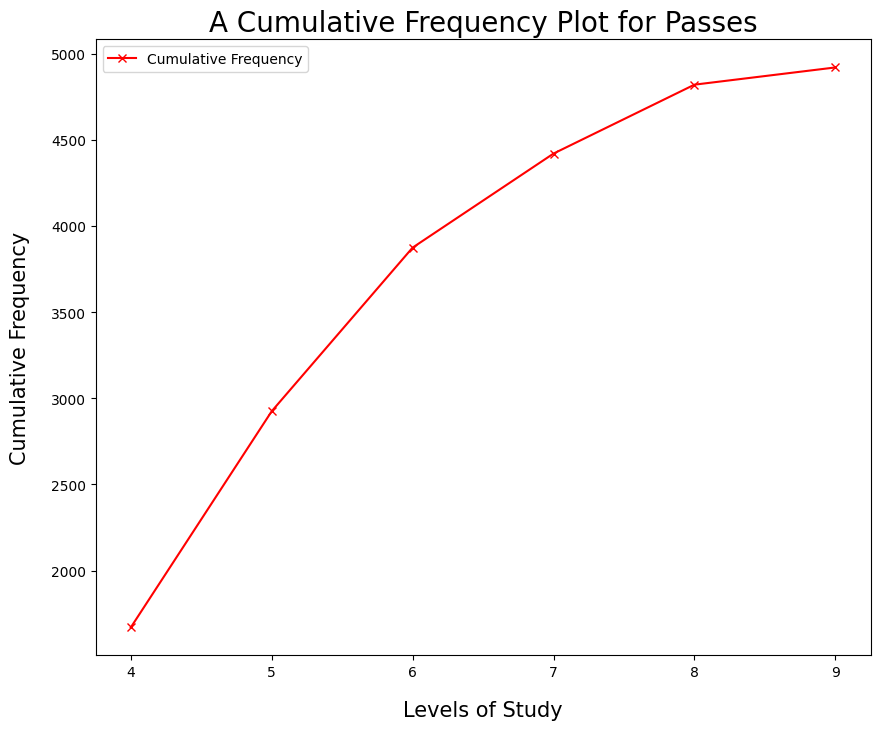

In [12]:
#note: rx- red colour, marker x, continuous line
df.plot(kind='line', x='Level', y='Cumulative Frequency',
        figsize=(10, 8), legend=True, style='rx-', label="Cumulative Frequency")
plt.title("A Cumulative Frequency Plot for Passes", fontsize=20)
plt.xlabel("Levels of Study", labelpad=15, fontsize=15)
plt.ylabel("Cumulative Frequency", fontsize=15, labelpad=15)
plt.legend()

The total number of pass is: 4921


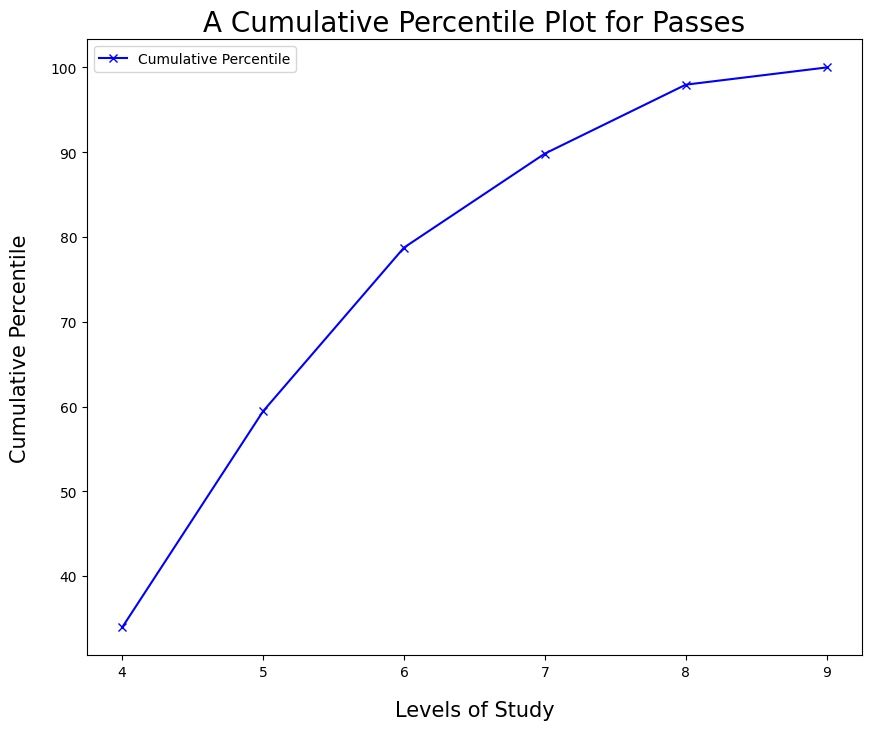

In [13]:
#Cumulative Percentile Plot

# Get the total frequency for the Pass_Frequency Column
total = df['Pass_Frequency'].sum()
print('The total number of pass is:', total)

#Convert Cumulative Frequency to Percentage and Add a Cumulative Percentile Column
df['Cumulative Percentile'] = df['Cumulative Frequency'] * 100/total

df.plot(kind='line', x='Level', y='Cumulative Percentile',
        figsize=(10, 8), legend=True, style='bx-', label="Cumulative Percentile")
plt.title("A Cumulative Percentile Plot for Passes", fontsize=20)
plt.xlabel("Levels of Study", labelpad=15, fontsize=15)
plt.ylabel("Cumulative Percentile", fontsize=15, labelpad=15)
plt.legend()

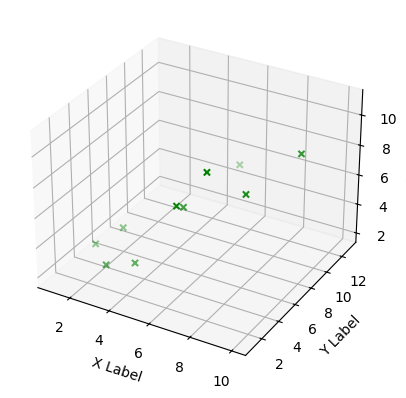

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='g', marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

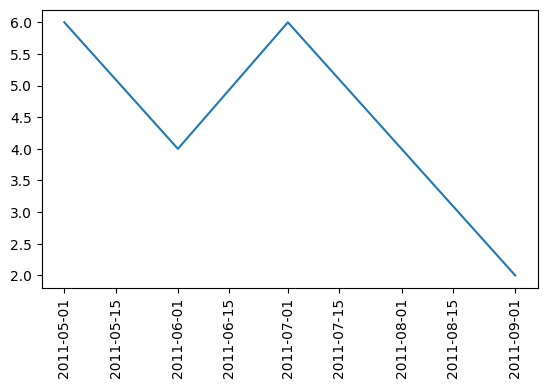

In [15]:
date_time = ["2011-09-01", "2011-08-01", "2011-07-01", "2011-06-01", "2011-05-01"]
date_time = pd.to_datetime(date_time)
temp = [2, 4, 6, 4, 6]

DF = pd.DataFrame()
DF['temp'] = temp
DF = DF.set_index(date_time)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF)

<ipython-input-17-29559f9f88de>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week One/Datasets/temperature.txt', parse_dates=True,index_col=0,


<Axes: xlabel='Date'>

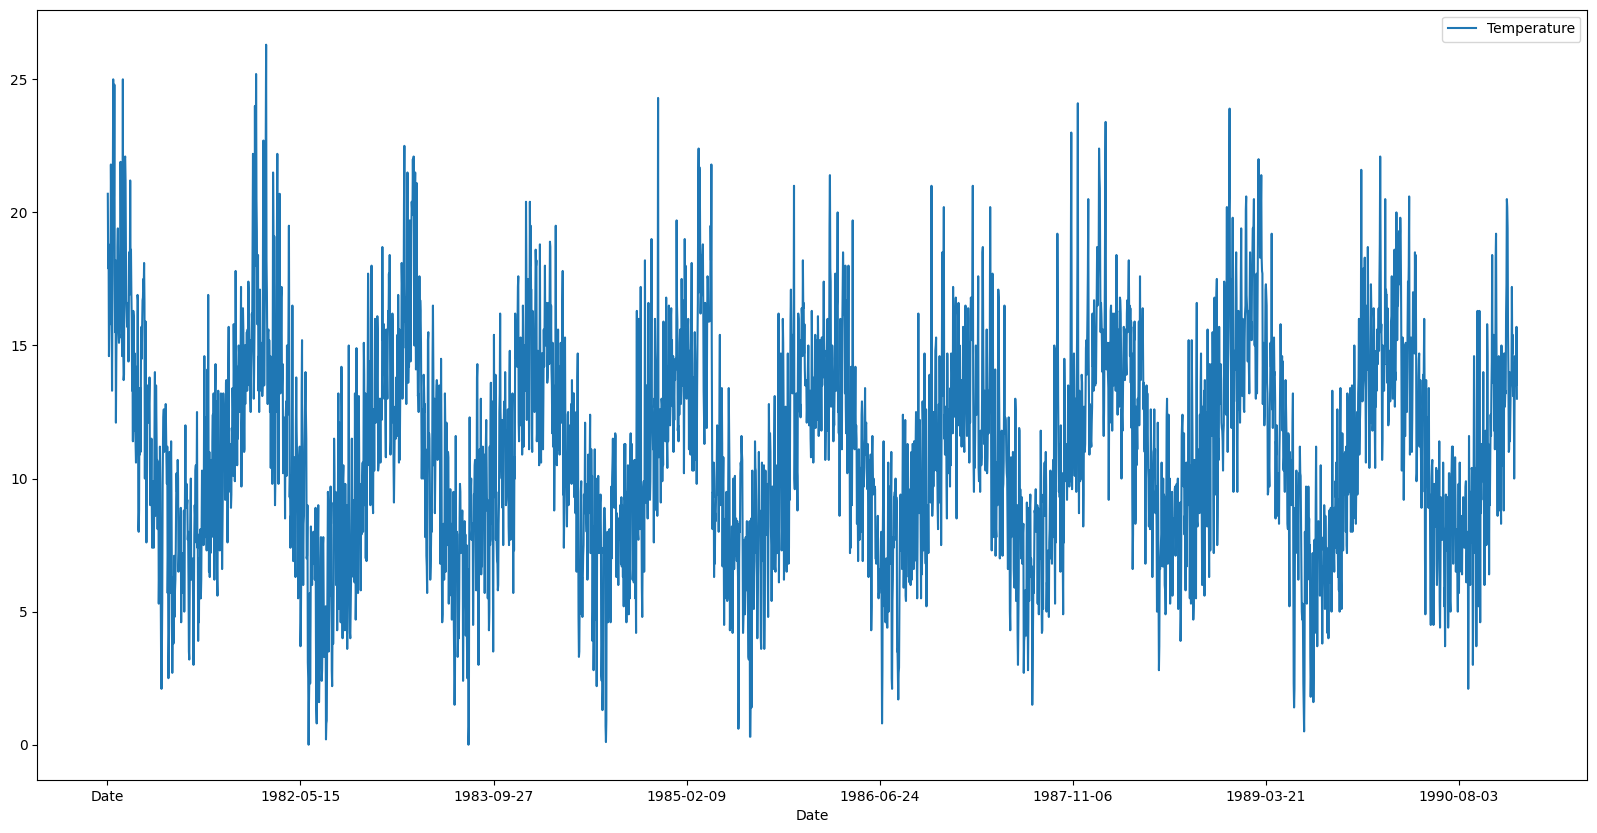

In [17]:
df = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week One/Datasets/temperature.txt', parse_dates=True,index_col=0,
names = ['Date','Temperature'])
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df.plot(figsize=(20, 10))

Data types in the file:

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object
Summary of the input file:
       account number     quantity   unit price   ext price  \
count     1000.000000  1000.000000  1000.000000  1000.00000   
mean    535208.897000    10.328000    56.179630   579.84390   
min      93356.000000     1.000000    10.060000    10.38000   
25%     299771.000000     5.750000    35.995000   232.60500   
50%     563905.000000    10.000000    56.765000   471.72000   
75%     750461.000000    15.000000    76.802500   878.13750   
max     995267.000000    20.000000    99.970000  1994.80000   
std     277589.746014     5.687597    25.331939   435.30381   

                                date  
count                           1000  
mean   2014-04-18 19:07:

<ipython-input-18-5e340a8c7822>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month",legend=None)


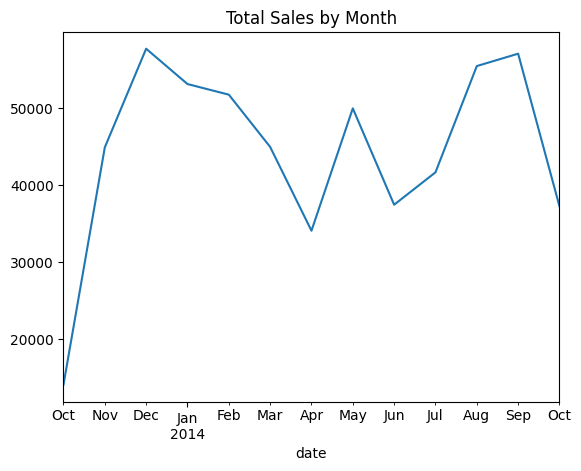

In [18]:
# Read in the csv file and display some of the basic info
sales=pd.read_csv("/content/drive/MyDrive/DAV Lab/Week One/Datasets/sales.txt",parse_dates=['date'])
print ("Data types in the file:\n")
print (sales.dtypes)
print ("Summary of the input file:")
print (sales.describe())
print ("Basic unit price stats:")
print (sales['unit price'].describe())

#Graphing
purchase_patterns = sales[['ext price','date']]

# Create a line chart showing purchases by month
purchase_patterns = purchase_patterns.set_index('date')
month_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month",legend=None)
fig_m = month_plot.get_figure()

#Show the image, then save it
plt.show()